In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras 
import os
import numpy as np
import pandas as pd
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import re
import random
import cv2
random.seed(0)
np.random.seed(0)

In [2]:
import tensorflow as tf
print(keras.__version__)

2.6.0


In [3]:
wheat=r'C:\Users\GOD\Leelavathi mam intern\agri_crop_classi\wheat'
maize=r'C:\Users\GOD\Leelavathi mam intern\agri_crop_classi\maize'
rice=r'C:\Users\GOD\Leelavathi mam intern\agri_crop_classi\rice'
sugarcane=r'C:\Users\GOD\Leelavathi mam intern\agri_crop_classi\sugarcane'
jute=r'C:\Users\GOD\Leelavathi mam intern\agri_crop_classi\jute'

In [4]:
dirlist=[wheat,maize,rice,sugarcane,jute]
classes=[0,1,2,3,4]
df=[]

In [5]:
for i,j in zip(dirlist,classes):
    filelist=os.listdir(i)
    #print(filelist)
    #print('\n')
    for f in filelist:
        filepath=os.path.join (i,f)
        df.append([filepath,j])

In [6]:
df=pd.DataFrame(df,columns=['filepaths','labels'])

In [7]:
df

filepaths  labels
0    C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       0
1    C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       0
2    C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       0
3    C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       0
4    C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       0
..                                                 ...     ...
799  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       4
800  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       4
801  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       4
802  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       4
803  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...       4

[804 rows x 2 columns]

In [34]:
ohencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohlabel = pd.DataFrame(ohencoder.fit_transform(df[['labels']]),dtype = 'float64',columns = ['label0','label1','label2','label3','label4'])
label_X = df.copy()
df = pd.concat([df,ohlabel],axis = 1)
new_df = df.drop(['labels'],axis = 1)
new_df.head()

filepaths  label0  label1  label2  \
0  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...     1.0     0.0     0.0   
1  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...     1.0     0.0     0.0   
2  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...     1.0     0.0     0.0   
3  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...     1.0     0.0     0.0   
4  C:\Users\GOD\Leelavathi mam intern\agri_crop_c...     1.0     0.0     0.0   

   label3  label4  label0  label1  label2  label3  label4  
0     0.0     0.0     1.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     1.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     1.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     1.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     1.0     0.0     0.0     0.0     0.0

In [9]:
def deep_pipeline(data):
    flat = []
    for i in data:
        img = plt.imread(i)
        img = img/255.
        flat.append(img)
    flat =  np.array(flat)    
    flat = flat.reshape(-1,224,224,3)       
    return flat

In [10]:
train,test = train_test_split(new_df,test_size=0.2,random_state=32,shuffle = True)

In [11]:
x_train = train['filepaths'].values
y_train = train.drop(['filepaths'],axis=1).values
x_test = test['filepaths'].values
y_test = test.drop(['filepaths'],axis=1).values

In [12]:
dx_train = deep_pipeline(x_train)
dx_test = deep_pipeline(x_test)

In [13]:
keras.backend.clear_session()

In [14]:
vgg = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights = 'imagenet',pooling='avg')

In [15]:
vgg.trainable = False

In [16]:
model = keras.Sequential([vgg
                         ,Dense(1000,activation='tanh'),Dense(1000,activation='tanh'),Dense(1000,activation='tanh'),Dense(5,activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1000)              513000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5005      
Total params: 22,544,389
Trainable params: 2,520,005
Non-trainable params: 20,024,384
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [19]:
hist = model.fit(dx_train,y_train,epochs=10,validation_split=0.3,batch_size=16)

Epoch 1/10
29/29 [==============================] - 208s 7s/step - loss: 2.9215 - accuracy: 0.2778 - val_loss: 1.8464 - val_accuracy: 0.3368
Epoch 2/10
29/29 [==============================] - 218s 8s/step - loss: 1.2237 - accuracy: 0.5156 - val_loss: 1.0516 - val_accuracy: 0.5803
Epoch 3/10
29/29 [==============================] - 245s 9s/step - loss: 1.0160 - accuracy: 0.6156 - val_loss: 1.4204 - val_accuracy: 0.4560
Epoch 4/10
29/29 [==============================] - 278s 10s/step - loss: 0.8462 - accuracy: 0.6689 - val_loss: 1.6444 - val_accuracy: 0.4560
Epoch 5/10
29/29 [==============================] - 278s 10s/step - loss: 0.9002 - accuracy: 0.6489 - val_loss: 0.7844 - val_accuracy: 0.6995
Epoch 6/10
29/29 [==============================] - 265s 9s/step - loss: 0.6164 - accuracy: 0.7511 - val_loss: 0.6376 - val_accuracy: 0.7358
Epoch 7/10
29/29 [==============================] - 281s 10s/step - loss: 0.4701 - accuracy: 0.8489 - val_loss: 0.6720 - val_accuracy: 0.7617
Epoch 8/10

(0.0, 4.0)

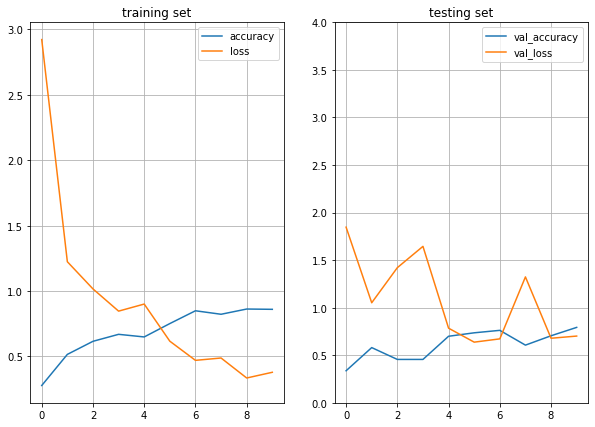

In [20]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['loss'],label='loss')
plt.legend()
plt.title("training set")
plt.grid()
plt.subplot(1,2,2)
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.title("testing set")
plt.grid()
plt.ylim((0,4))

In [22]:
score = model.evaluate(dx_test,y_test)
print("accuracy: ", score[1])

6/6 [==============================] - 71s 12s/step - loss: 0.6980 - accuracy: 0.8075
accuracy:  0.8074533939361572


In [30]:
pred = model.predict(dx_test)
prediction = np.argmax(pred,axis=1)
true = np.argmax(y_test,axis=1)
best_prob = [pred[num,:][i] for num,i in enumerate(prediction)]
prediction

array([4, 2, 4, 3, 4, 4, 1, 4, 4, 0, 2, 0, 4, 0, 1, 4, 0, 4, 0, 1, 0, 2,
       0, 1, 4, 4, 1, 2, 1, 4, 4, 4, 4, 2, 3, 0, 2, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 4, 4, 3, 1, 4, 3, 4, 4, 0, 3, 4, 4,
       1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 4, 1, 2, 2, 4, 0, 2, 4, 1,
       0, 3, 2, 1, 0, 1, 2, 1, 4, 2, 4, 2, 0, 0, 4, 1, 2, 0, 2, 4, 0, 4,
       3, 4, 2, 3, 4, 1, 2, 2, 2, 0, 1, 4, 0, 0, 4, 4, 2, 0, 2, 3, 3, 3,
       0, 0, 2, 1, 4, 2, 4, 4, 2, 1, 0, 2, 2, 2, 3, 1, 1, 3, 2, 2, 2, 0,
       0, 4, 4, 1, 0, 2, 4], dtype=int64)

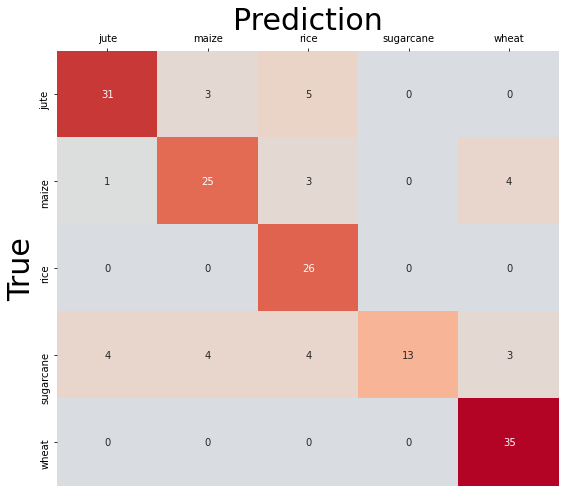

In [24]:
#confusion matrix
plt.figure(figsize = (9,8))
class_label = ['jute','maize','rice','sugarcane','wheat']
fig = sns.heatmap(confusion_matrix(true,prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,center = True,xticklabels=class_label,yticklabels=class_label)
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

In [35]:
#pipelining
def deepmodelpipeline(imagepath,model = model,label=[-1]):
    pdict = {0:"wheat",1:"maize",2:"rice",3:"sugarcane",4:"jute"}
    pred_x = deep_pipeline([imagepath])
    prediction = model.predict(pred_x)
    pred = np.argmax(prediction[0])
    plt.imshow(plt.imread(imagepath))
    if (label[0]!=-1):
        plt.title("prediction : {0} % {1:.2f} \ntrue        : {2}".format(pdict[pred],prediction[0,pred]*100,pdict[np.argmax(label)]))
    else:
        plt.title("prediction : {0}, % {1:.2f}".format(pdict[pred],prediction[0,pred]*100))

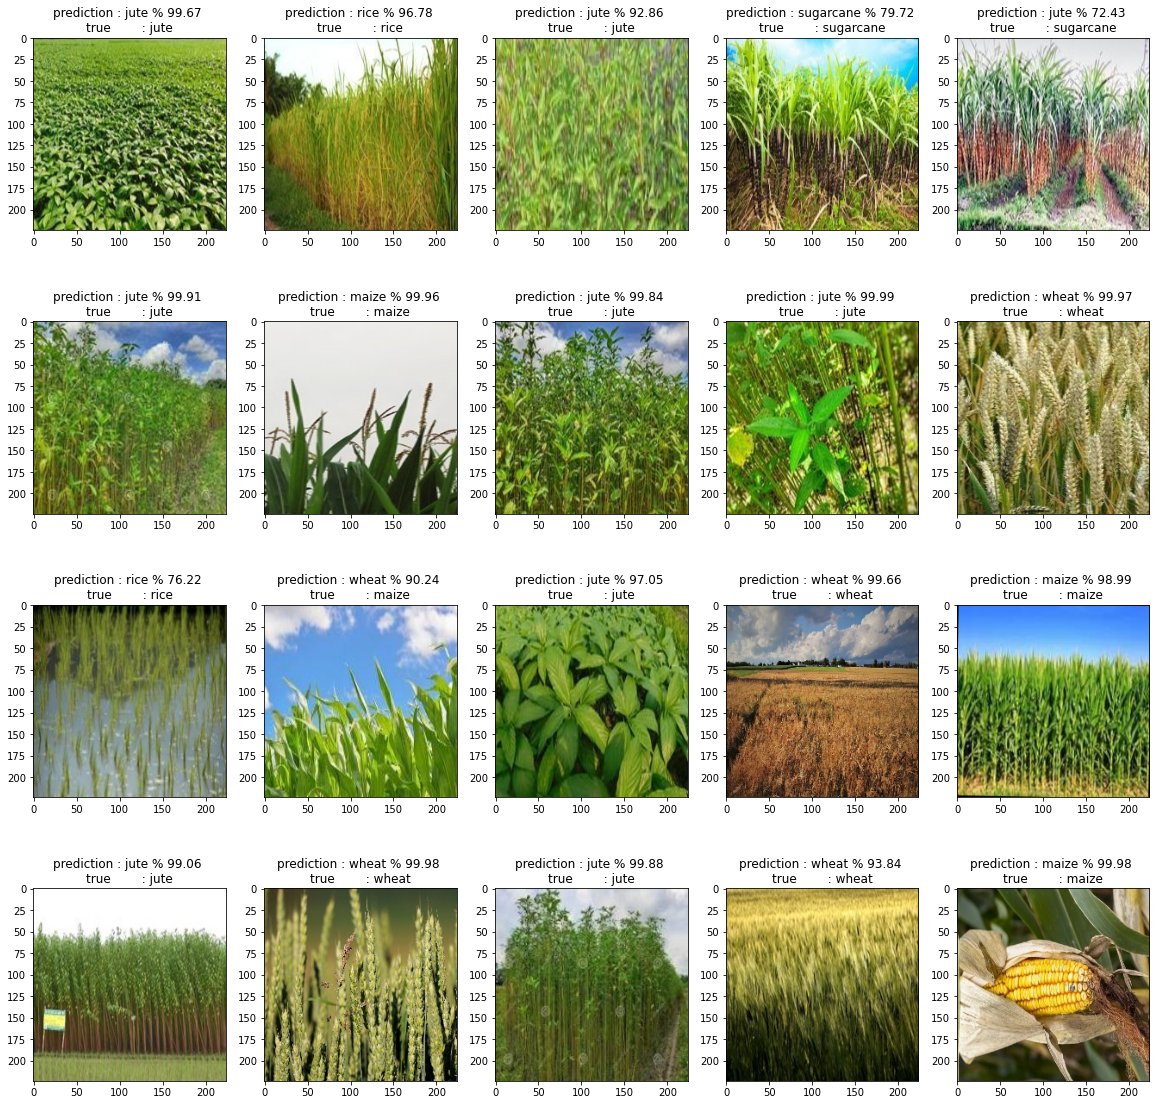

In [36]:
plt.figure(figsize=(20,20))
for num,path in enumerate(x_test[0:20]):
    plt.subplot(4,5,num+1)
    deepmodelpipeline(path,model,y_test[num])

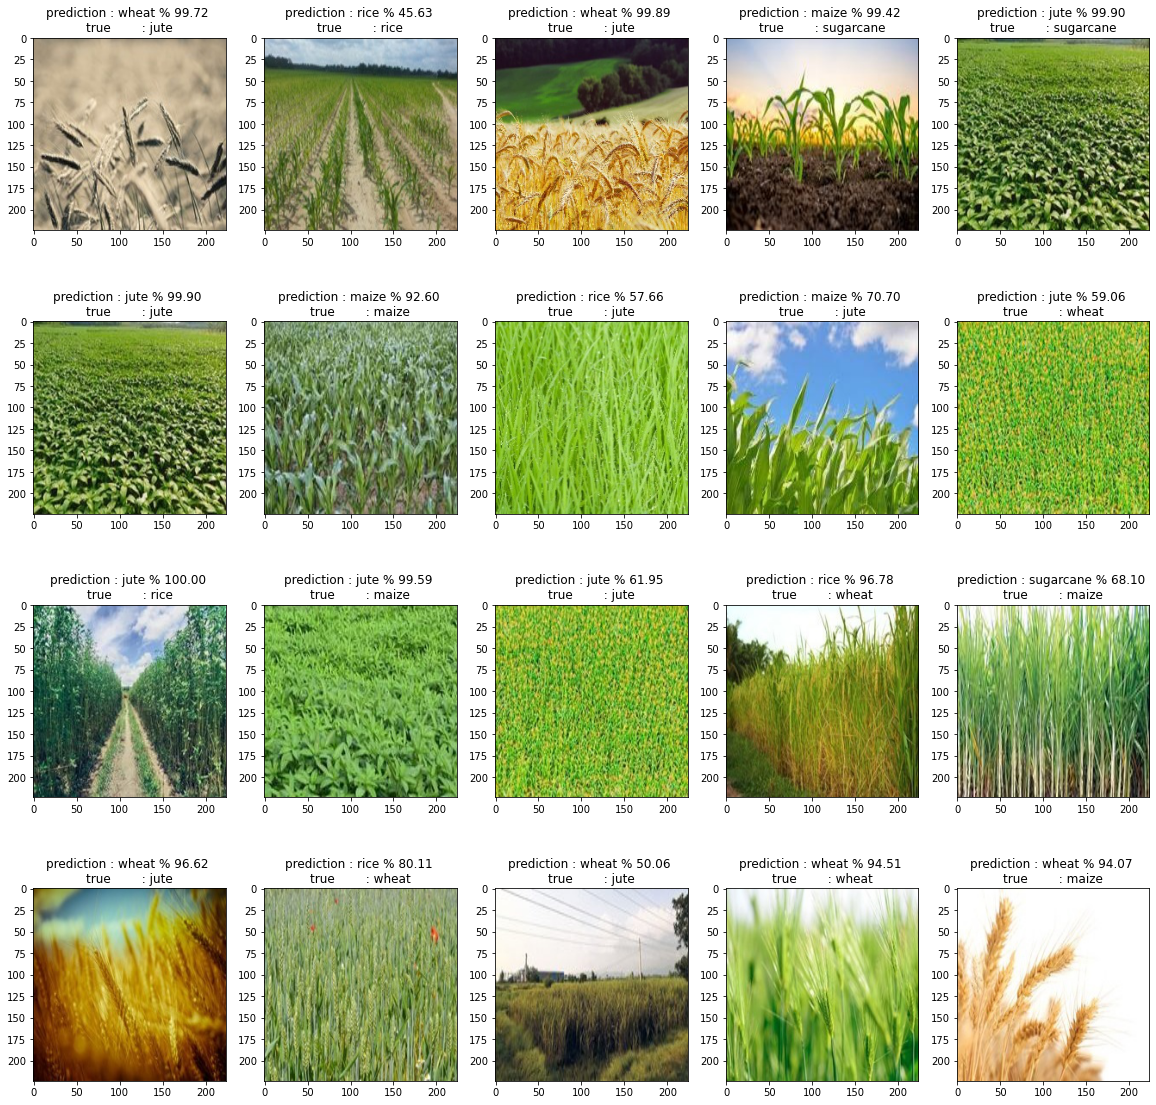

In [37]:
plt.figure(figsize=(20,20))
for num,path in enumerate(x_test[20:40]):
    plt.subplot(4,5,num+1)
    deepmodelpipeline(path,model,y_test[num])

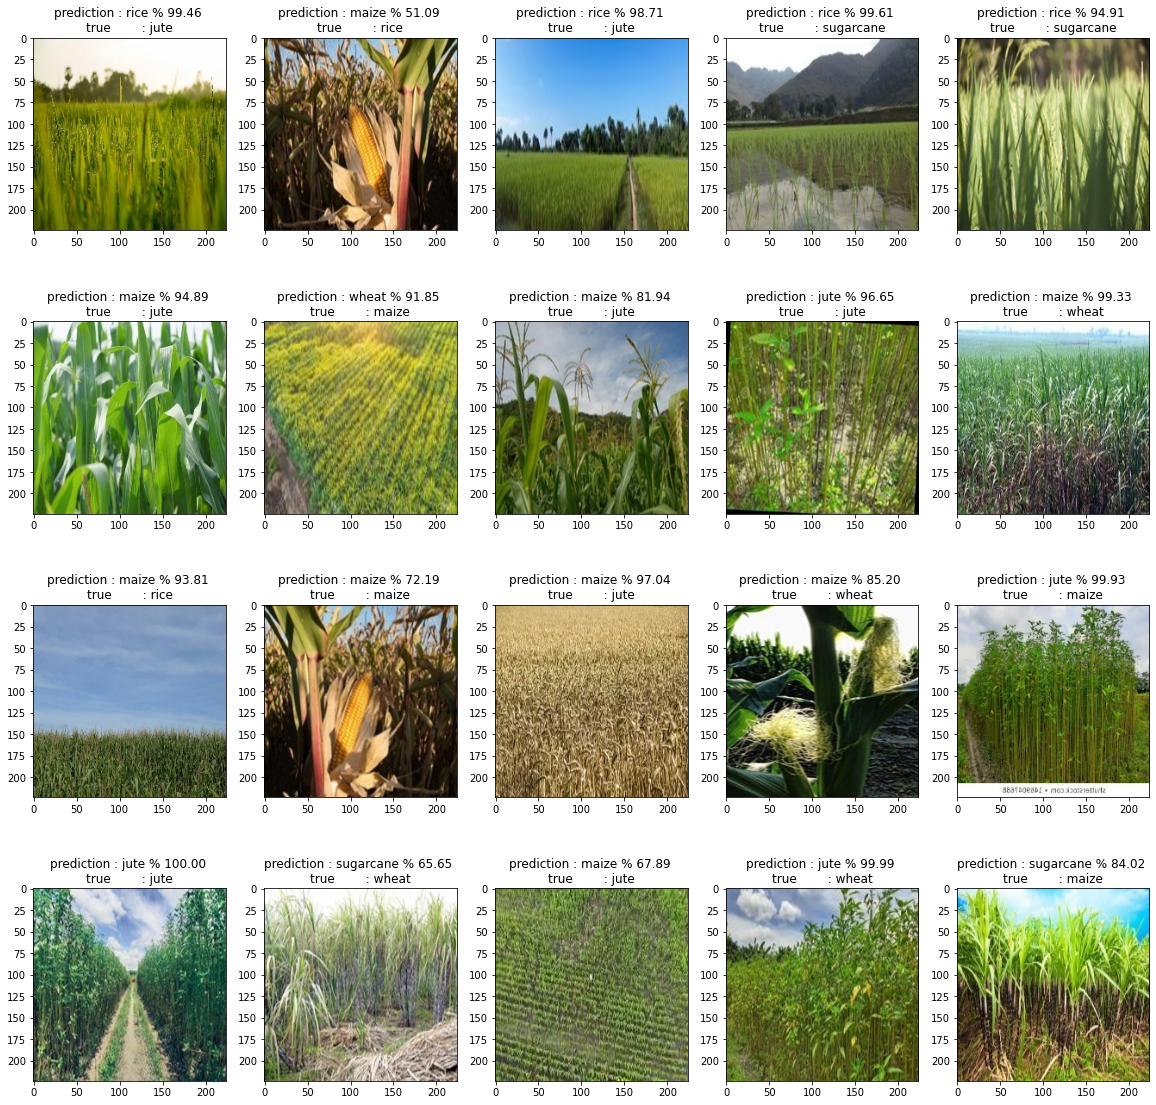

In [38]:
plt.figure(figsize=(20,20))
for num,path in enumerate(x_test[40:60]):
    plt.subplot(4,5,num+1)
    deepmodelpipeline(path,model,y_test[num])